**THE FOLLOWING CODES DEMONSTRATE FOUR EXPERIMENTS**
    1. TOSSING A COIN
    2. ROLLING A DIE
    3. MONTY HALL PROBLEM
    4. BUFFON'S NEEDLE PROBLEM AND CALCULATION OF PI VALUE

Number of trials:  5000
Final probability of getting head : 0.4972


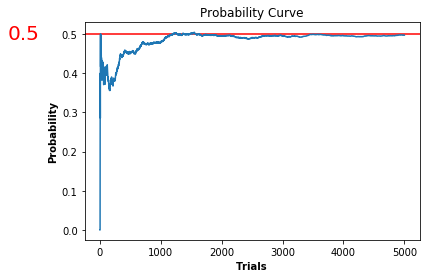

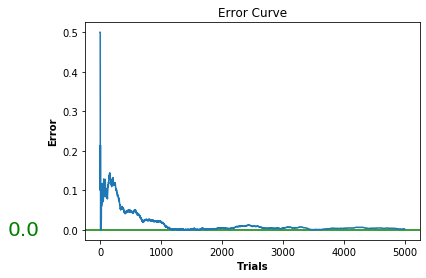

Simulation time:  85.18511986732483 Sec.


In [2]:
# Example 1: Tossing a coin

import random
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

start=time.time()
#Experiment : Tossing a Coin

# Random variable, X = Number of head, 1 implies Head and 0 implies Tail

# Monte Carlo Simulation of the experiment :

#Calculate probability values.

ProbList = [] # Initial empty list
ErrList = []

def MonteCarloTrial(n):
    heads = 0 # Initial head count
    for i in range(n):
        TossResult = random.randint(0,1)     # 1 implies Head and 0 implies Tail
        heads = heads + TossResult
        
        #Calculating probability value :
        prob_value = heads/(i+1)
        err_value=abs(0.5-prob_value)
        
        #Append the probability values to the list :
        ProbList.append(prob_value)
        
        #Append the error values to the list :
        ErrList.append(err_value)
        
        
        print("Trial # : ", i)
        print("Probability of getting head : ",prob_value)
        print("Error : ",err_value)
        
        time.sleep(0.00001)
        clear_output(wait=True)
        
    return heads/n, i+1
  
#Calling the function :
trials=5000    # 5000 times repeated experimet
HeadProb, nTrials = MonteCarloTrial(trials) 
print("Number of trials: ", nTrials)
print("Final probability of getting head :",HeadProb)

#Plot the results :
TextStyleRed = dict(size=20, color='red', horizontalalignment='right', verticalalignment='center')
TextStyleGreen = dict(size=20, color='green', horizontalalignment='right', verticalalignment='center')

plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel("Trials", fontweight='bold')
plt.ylabel("Probability", fontweight='bold')
plt.text(-0.2*trials,0.5, "0.5", **TextStyleRed)
plt.title("Probability Curve")
plt.plot(ProbList)
plt.show()

plt.axhline(y=0.0, color='g', linestyle='-')
plt.xlabel("Trials", fontweight='bold')
plt.ylabel("Error", fontweight='bold')
plt.text(-0.2*trials,0, "0.0", **TextStyleGreen)
plt.title("Error Curve")
plt.plot(ErrList)
plt.show()

stop=time.time()
print("Simulation time: ", stop-start, "Sec.")



Throw # =  1000

Die throw result:  1

Cumulative total count after at each throw:  [[185. 173. 182. 149. 154. 157.]]

Prob result after at each throw:  [[0.185 0.173 0.182 0.149 0.154 0.157]]


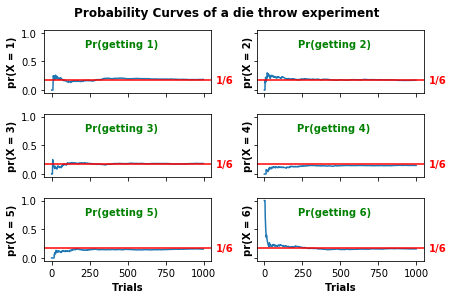



Simulation time:  6.764042139053345 Sec.


In [91]:
# Example 2: Rolling a die

import random
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import numpy as np

start=time.time()

#Experiment : Rolling a die

# Random variable, X = Number of dot(s) in a die

# Monte Carlo Simulation of the experiment :

#Calculate probability values.

ntrials = 1000    # 1000 times repeated experimet

ProbMatrix = np.zeros((ntrials, 6))    # Initial empty array


def MonteCarloTrial(n):

    ProbResult = np.zeros((1, 6))    # Initial Result

    for i in range(n):
        
        print("\nThrow # = ", i+1)
        
        Temp = np.zeros((1, 6))

        DieThrowResult = random.randint(1,6) 
        print("\nDie throw result: ", DieThrowResult)

        Temp[0, DieThrowResult-1] = 1        
      
        ProbResult += Temp
        
        print("\nCumulative total count after at each throw: ", ProbResult)
               
        x = np.divide(ProbResult,(i+1))
        print("\nProb result after at each throw: ", x)
        
        
        #Append the probability values to the array :
        
        ProbMatrix[i, :]=x
        
#         time.sleep(0.5)
        if i < n-1:
            clear_output(wait=True)
        
    return ProbMatrix
  
# #Calling the function :
              
FinalProb = MonteCarloTrial(ntrials)

TextStyleRed = dict(size=10, color='red', horizontalalignment='right', verticalalignment='center', fontweight='bold')
TextStyleGreen = dict(size=10, color='green', horizontalalignment='right', verticalalignment='center', fontweight='bold')

fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
fig.tight_layout(rect=[0, 0, 1, 0.95], w_pad=3.0)
fig.suptitle("Probability Curves of a die throw experiment", fontweight='bold')

k=0
for i in range(3):
    for j in range(2):
        ylabelText = "pr(X = " + str(k+1) + ")"
        titleText = "Pr(getting " + str(k+1) + ")"
        axs[i,j].plot(FinalProb[:, k])
        axs[i,j].axhline(y=0.167, color='r', linestyle='-')
        axs[i,j].set_ylabel(ylabelText, fontweight='bold')
        axs[i,j].text(1.2*ntrials,0.167, "1/6", **TextStyleRed)
        axs[i,j].text(0.7*ntrials,0.8, titleText, **TextStyleGreen)
        # axs[i,j].set_title(titleText)
        if i==2:
            axs[i,j].set_xlabel("Trials", fontweight='bold')
        k+=1

plt.show()

stop=time.time()
print("\n\nSimulation time: ", stop-start, "Sec.")



Winning probability if you always switch: 0.66
Winning probability if you always stick to your original choice: 0.34


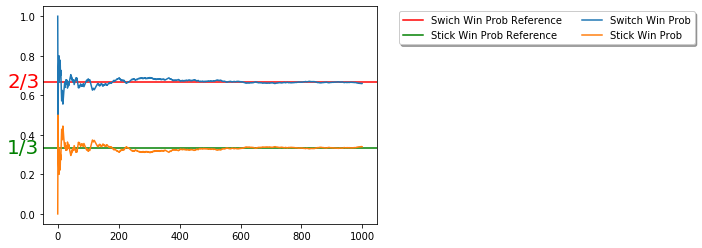



Simulation time:  0.200547456741333 Sec.


In [8]:
# Example 3: Monty Hall Problem
# Ref: https://brilliant.org/wiki/monty-hall-problem/
#Import required libraries :
import random
import matplotlib.pyplot as plt

start=time.time()

#We are going with 3 doors :
#1 - Car
#2 - Goats
doors = ["goat","goat","car"]

#Empty lists to store probability values :
switch_win_probability = []
stick_win_probability = []

#Monte_Carlo Simulation :
def monte_carlo(n):
    
    #Calculating switch and stick wins :
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
    
        #Randomly placing the car and goats behind the three doors :
        random.shuffle(doors) 
        
        #Contestant's choice :
        k = random.randrange(2)  

        #If the contestant doesn't get car :
        if doors[k] != 'car': 
            switch_wins += 1
            
        #If the contestant got car :
        else: 
            stick_wins += 1

        #Updating the list values :
        switch_win_probability.append(switch_wins/(i+1))
        stick_win_probability.append(stick_wins/(i+1))
        
    
    #Print the probability values :
    print('Winning probability if you always switch:',switch_win_probability[-1])
    print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])

    #Plotting the data :
    TextStyleRed = dict(size=20, color='red', horizontalalignment='right', verticalalignment='center')
    TextStyleGreen = dict(size=20, color='green', horizontalalignment='right', verticalalignment='center')
    LegendLabel=["Swich Win Prob Reference", "Stick Win Prob Reference","Switch Win Prob" , "Stick Win Prob"]
    LegendStyle=dict(loc='upper left', bbox_to_anchor=(1.05, 1), fancybox=True, shadow=True, ncol=2)
    plt.axhline(y=0.66666, color='r', linestyle='-')
    plt.text(-60,0.66666, "2/3", **TextStyleRed)
    plt.axhline(y=0.33333, color='g', linestyle='-')
    plt.text(-60,0.33333, "1/3", **TextStyleGreen)
    plt.plot(switch_win_probability)
    plt.plot(stick_win_probability)
    plt.legend(LegendLabel, **LegendStyle)
    plt.show()

    
#Calling the function :
monte_carlo(1000)

stop=time.time()
print("\n\nSimulation time: ", stop-start, "Sec.")

Calculated PI values after all trials:  3.1362709738121373


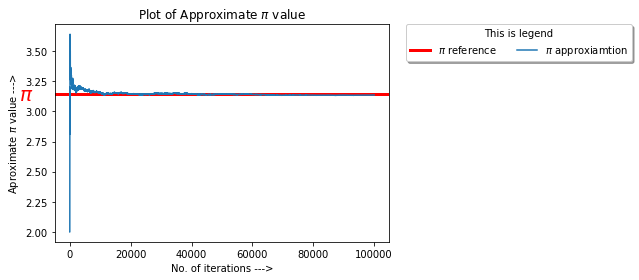

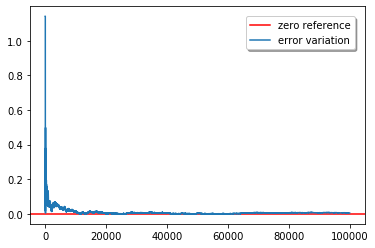

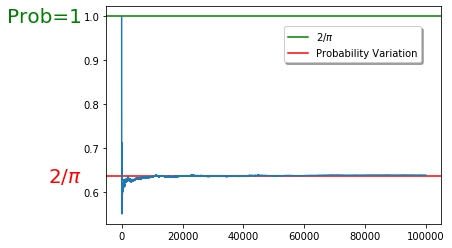



Simulation time:  0.9018003940582275 Sec.


In [9]:
# Example 4: Buffon's Needle Problem - One needle is thrown 10000 times
#Ref: https://en.wikipedia.org/wiki/Buffon%27s_needle_problem
# Import required libraries :
import random
import math
import matplotlib.pyplot as plt

start=time.time()

#Total number of trials :
trials = 100000

#Length of needle :
needle_len = 2  

#space between 2 horizontal lines : This is same as needle_length
d = 2

#Empty list to store pi values :
pi_values = []
pi_errors= []
prob=[]
    
#Initialize number of hits as 0.
nhits = 0
    
#For all trials :
for i in range(trials):
  #The distance of the middle point of the needle from the nearest horizontal line :
  #Min = 0     Max = d/2
  x = random.uniform(0,d/2.0)
  
  #The theta value will be from 0 to pi/2 :
  theta = random.uniform(0,math.pi/2)
  
  #Checking if the needle crosses the line or not :
  xtouch  = x - (needle_len/2.0)*math.sin(theta)  
  if xtouch < 0 :
    nhits += 1
        
  prob_calc=nhits/(i+1);
  prob.append(prob_calc)
                
  #Going with the formula :
  numerator = 2.0 * needle_len 
  denominator = d * prob_calc
  if denominator == 0:
    pi_temp_value=0;
  else:
    pi_temp_value =  numerator/denominator  
  
  #Append the final value of pi :
  pi_values.append(pi_temp_value)
  pi_errors.append(abs(math.pi-pi_temp_value))
                        
#Final pi value after all trials :
print("Calculated PI values after all trials: ",pi_values[-1])
      

#Plotting the graph :
TextStyle=dict(size=20, color='red', horizontalalignment='right', verticalalignment='center')
plt.axhline(y=math.pi, color='r', linestyle='-', linewidth=3)
#plt.text(-12000,math.pi, "$\pi$", fontsize=20, color="red", horizontalalignment='right', verticalalignment='center') # This is also valid
plt.text(-12000,math.pi, "$\pi$", **TextStyle)
plt.plot(pi_values) 
plt.xlabel("No. of iterations --->")
plt.ylabel("Aproximate $\pi$ value --->")
plt.title("Plot of Approximate $\pi$ value")
plt.legend(["$\pi$ reference", "$\pi$ approxiamtion"], loc='upper left', bbox_to_anchor=(1.05, 1), fancybox=True, shadow=True, title="This is legend", frameon=True, borderaxespad=0, ncol=2, framealpha=1)
left, right = plt.xlim()
plt.show()

plt.axhline(y=0, color='r', linestyle='-', label='zero reference')
plt.plot(pi_errors,label='error variation')
plt.legend(loc='upper right', fancybox=True, shadow=True,borderaxespad=1)
plt.show()


LegendLabel=["2/$\pi$", "Probability Variation"]
LegendStyle=dict(loc='upper right', fancybox=True, shadow=True,borderaxespad=2)
TextStyleRed = dict(size=20, color='red', horizontalalignment='right', verticalalignment='center')
TextStyleGreen = dict(size=20, color='green', horizontalalignment='right', verticalalignment='center')
plt.axhline(y=1, color='g', linestyle='-')
plt.text(-13000,1, "Prob=1", **TextStyleGreen)
plt.axhline(y=2/math.pi, color='r', linestyle='-')
plt.text(-13000,2/math.pi, "2/$\pi$", **TextStyleRed)
plt.plot(prob)
plt.legend(LegendLabel,**LegendStyle)
plt.show()

stop=time.time()
print("\n\nSimulation time: ", stop-start, "Sec.")
